In [64]:
import bt
import pandas as pd
import matplotlib as plt

%matplotlib inline

In [9]:
dataset_name = "sma_model" #"^IXIC"
field_name = "Close"

n_lookback = 3 #50

In [50]:
ticker_data_path = "../data/" + dataset_name + ".csv"

all_data = pd.read_csv(ticker_data_path, index_col=0, 
            parse_dates=True, infer_datetime_format=True,
            thousands=None)

data = all_data.loc[:, [field_name]]

In [51]:
all_data

,Close,→W
Date,,
2010-01-01,25.3,0.0
2010-02-01,23.5,0.0
2010-03-01,35.3,0.0
2010-04-01,20.5,1.0
2010-05-01,12.4,-1.0
2010-06-01,27.4,-1.0
2010-07-01,30.2,1.0
2010-08-01,25.0,1.0


In [46]:
sma = data.rolling(n_lookback).mean()

weights = sma.copy()
weights[data > sma] = 1.0;
weights[data <= sma] = -1.0;
# weight = weight.shift(-1)
weights[weight.isnull()] = 0.0;

In [52]:
weights = all_data.loc[:, ["→W"]]
weights.columns = [field_name]

In [53]:
pd.concat([data, weights], axis=1)

,Close,Close
Date,,
2010-01-01,25.3,0.0
2010-02-01,23.5,0.0
2010-03-01,35.3,0.0
2010-04-01,20.5,1.0
2010-05-01,12.4,-1.0
2010-06-01,27.4,-1.0
2010-07-01,30.2,1.0
2010-08-01,25.0,1.0


In [54]:
s = bt.Strategy('specw', [bt.algos.WeighTarget(weights),
                               bt.algos.Rebalance()])
t = bt.Backtest(s, data)
res = bt.run(t)

specw
0% [#########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [55]:
res.get_weights()

,specw,specw>Close
2009-12-31,1.0,0.000000
2010-01-01,1.0,0.000000
2010-02-01,1.0,0.000000
2010-03-01,1.0,0.000000
2010-04-01,1.0,0.999990
2010-05-01,1.0,-1.000004
2010-06-01,1.0,-0.000000
2010-07-01,1.0,-0.000000
2010-08-01,1.0,-0.000000


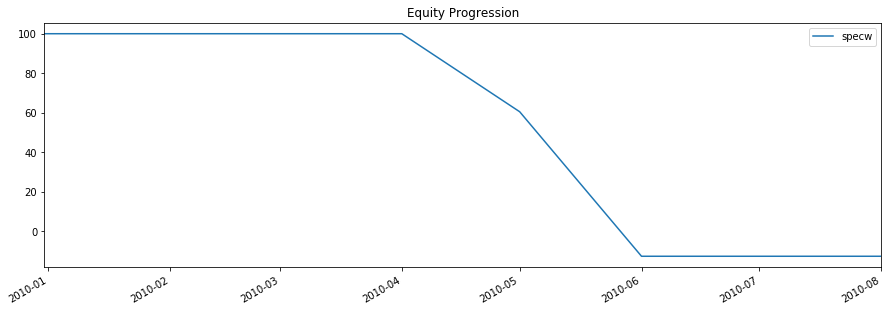

In [67]:
res.plot()

In [57]:
res.prices

,specw
2009-12-31,100.0000
2010-01-01,100.0000
2010-02-01,100.0000
2010-03-01,100.0000
2010-04-01,100.0000
2010-05-01,60.4882
2010-06-01,-12.6833
2010-07-01,-12.6833
2010-08-01,-12.6833
